# LAB 3 - OCR

**objectives:**

* implement Optical Character Recognition (OCR)

**help:**

* machine learning algorithm : [SCIKITS learn](http://scikit-learn.sourceforge.net//)


## Threshold and labelling

1. import image [doc1.png](http://homepages.ulb.ac.be/~odebeir/data/doc1.png)
2. segment and label objects using the following code

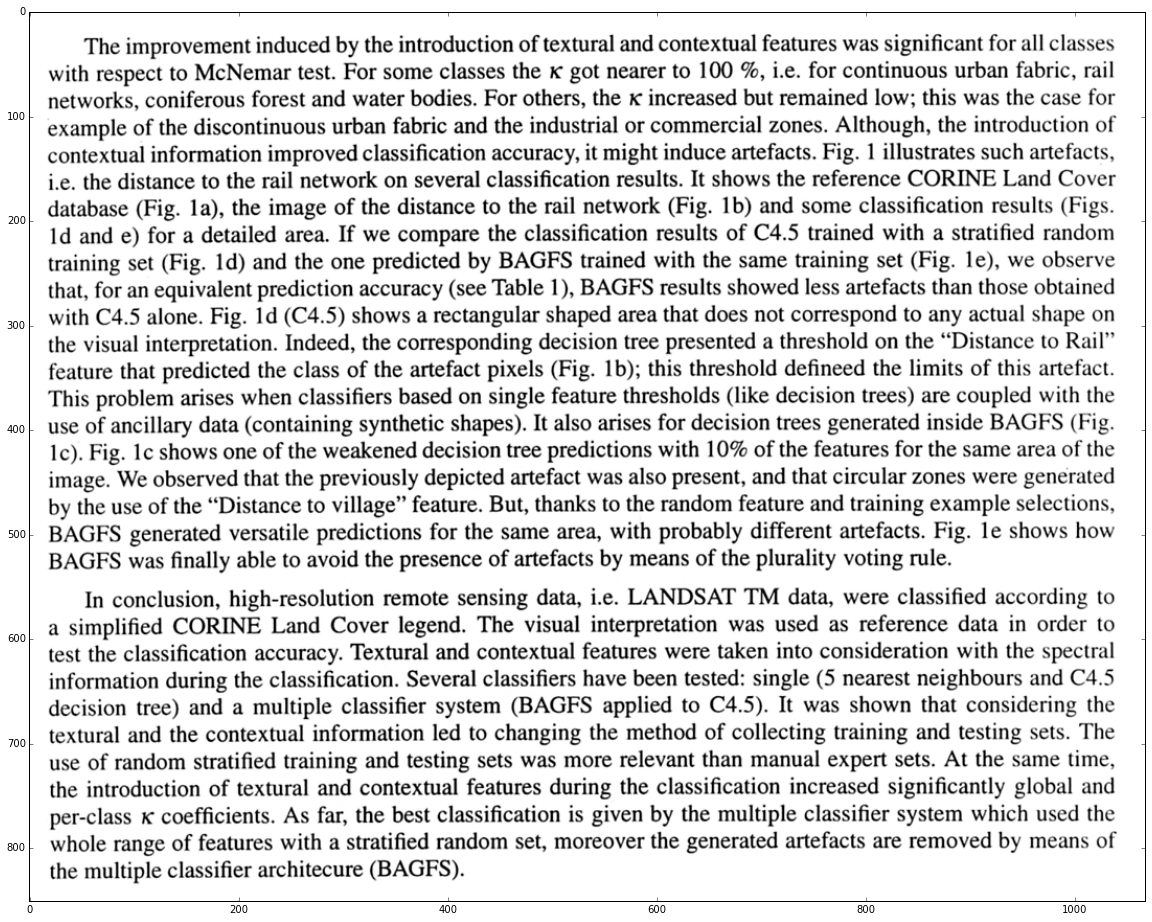

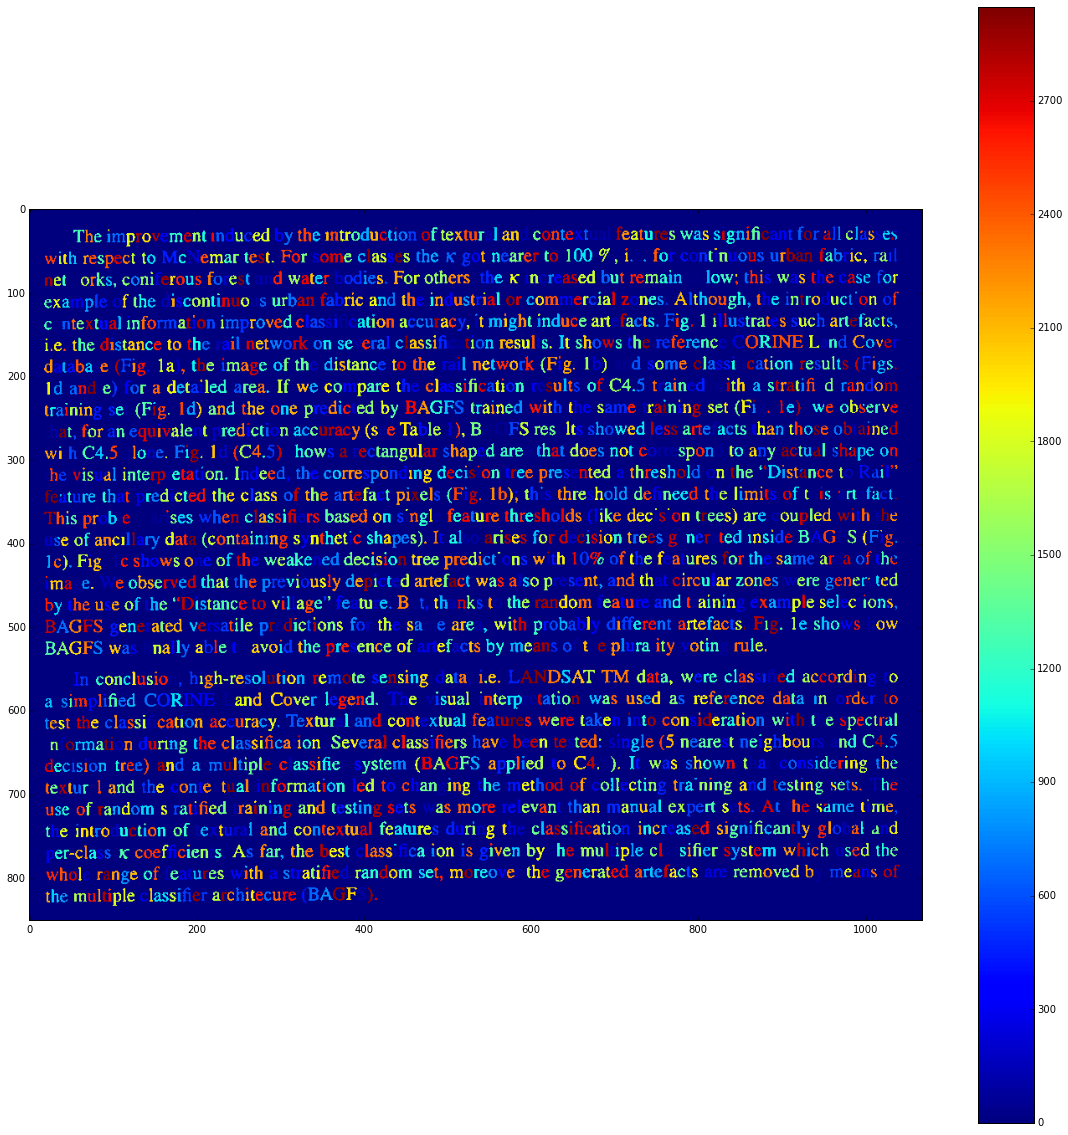

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np
from skimage.measure import label,regionprops
from matplotlib.patches import Rectangle

ima = imread('http://homepages.ulb.ac.be/~odebeir/data/doc1.png')
# a letter is darker than the background
th_ima = ima<128 

# load the label correpsonding to the learning set
lab = np.load('text_labels.npy') 

plt.figure(figsize=[20,20])
plt.imshow(ima,cmap=plt.cm.gray);
plt.figure(figsize=[20,20])
plt.imshow(lab)
plt.colorbar();


## Line detection and letter ordering

1. extract from each label the centroid position
2. find labels (objects) that bellong to each text line
3. order each text line from left to right

(200, 100)

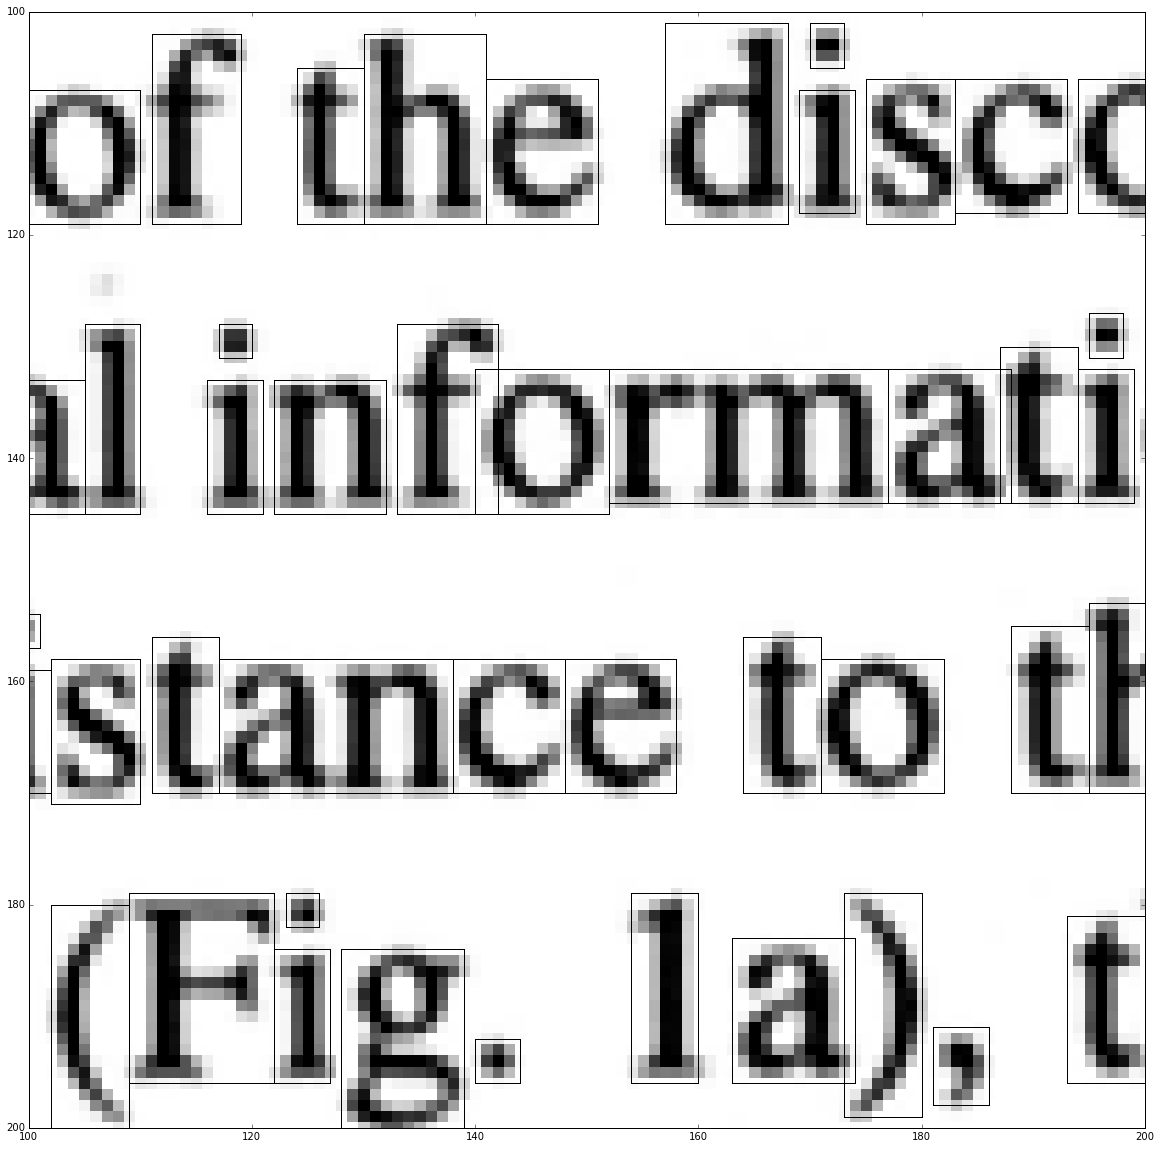

In [132]:
# example of feature extraction applied on the label image 
# (bounding box)
plt.figure(figsize=[20,20])
plt.imshow(ima,interpolation='nearest',cmap=plt.cm.gray);
ax = plt.gca()

# retrieve label from local file
lab = np.load('text_labels.npy')

objects = regionprops(lab)
for obj in objects:
    bb = obj['bbox']
    centroid = obj['centroid']
    x0 = bb[1]
    y0 = bb[0]
    w = bb[3]-bb[1]+1
    h = bb[2]-bb[0]+1
    ax.add_patch(Rectangle((x0-1,y0-1),w,h,fc='none'))
    
ax.set_xlim([100,200])
ax.set_ylim([200,100])


## Feature extraction

1. extract from each label descriptive features such as area, perimeter, ...

## Learning and classification

1. import a given supervised learning set *super.json* containing and a labelised image *text_labels.npy*
2. count the frequency of each symbol
3. class letters using a nearest neighbor (! normalization)

In [136]:
import json
import pprint

super_file = 'super.json'
supervision = json.load(open(super_file,'rt'))

# supervision is a dict containing the training
# ! the keys are strings, not integers
pprint.pprint(supervision)

{u'1': u'i',
 u'10': u'w',
 u'100': u'S',
 u'1000': u'S',
 u'1001': u'o',
 u'1002': u't',
 u'1003': u'e',
 u'1004': u't',
 u'1005': u'o',
 u'1006': u's',
 u'1007': u'm',
 u'1008': u't',
 u'1009': u'f',
 u'101': u'*',
 u'1010': u'*',
 u'1011': u'D',
 u'1012': u'l',
 u'1013': u'n',
 u'1014': u'a',
 u'1015': u'n',
 u'1016': u'a',
 u'1017': u',',
 u'1018': u'*',
 u'1019': u'e',
 u'102': u't',
 u'1020': u'R',
 u'1021': u'm',
 u'1022': u'*',
 u'1023': u'*',
 u'1024': u'o',
 u'1025': u'*',
 u'1026': u'c',
 u'1027': u'l',
 u'1028': u'o',
 u'1029': u's',
 u'103': u'*',
 u'1030': u'*',
 u'1031': u'c',
 u'1032': u'r',
 u'1033': u'o',
 u'1034': u'as',
 u'1035': u'rp',
 u'1036': u'al',
 u'1037': u'*',
 u'1038': u'e',
 u'1039': u'*',
 u'104': u'v',
 u'1040': u'*',
 u'1041': u'tu',
 u'1042': u't',
 u'1043': u'5',
 u'1044': u'00',
 u'1045': u'o',
 u'1046': u'f',
 u'1047': u'a',
 u'1048': u'w',
 u'1049': u'l',
 u'105': u'd',
 u'1050': u'e',
 u'1051': u'e',
 u'1052': u'd',
 u'1053': u'f',
 u'1054': u'a'

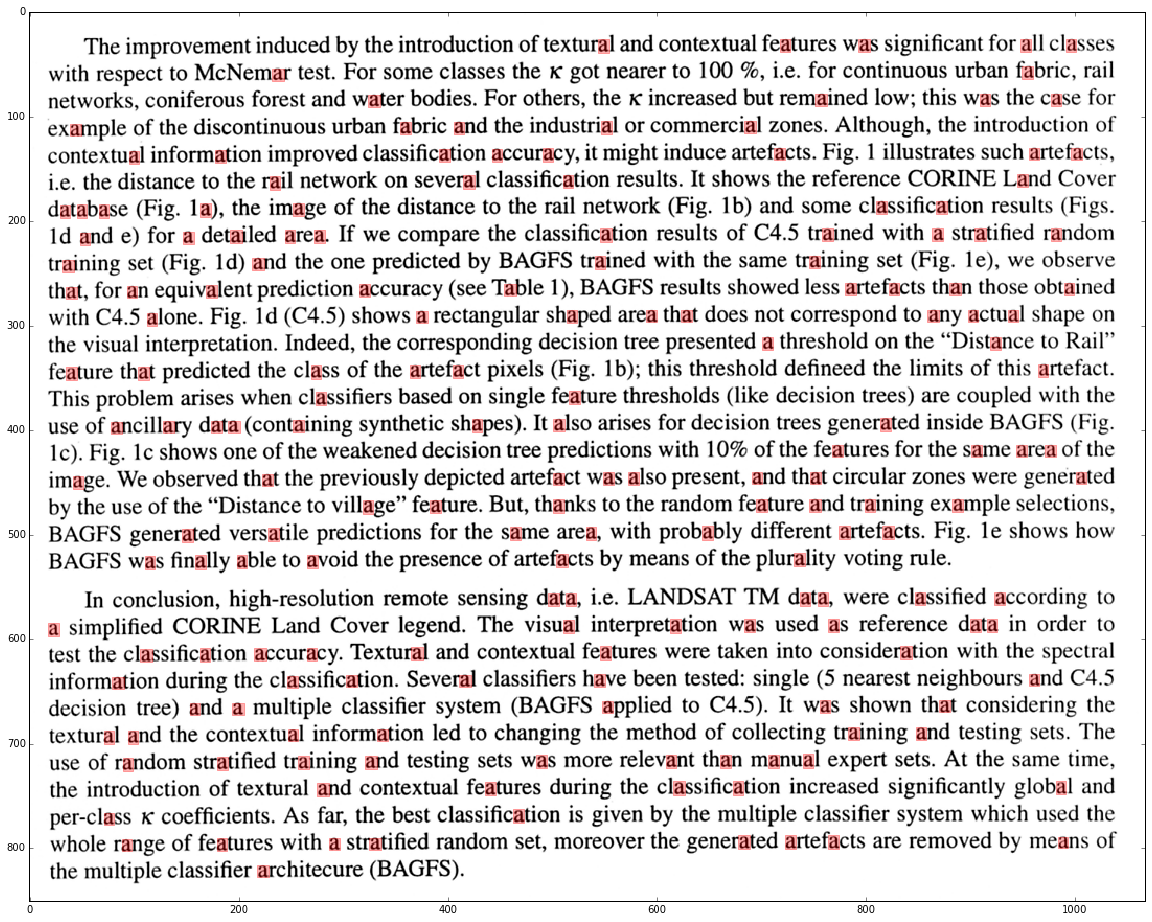

In [147]:
# simple example code that boxes only 'a' characters
plt.figure(figsize=[20,20])
plt.imshow(ima,interpolation='nearest',cmap=plt.cm.gray);
ax = plt.gca()

for obj in objects:
    str_label = '%s'%obj['label']
    if supervision[str_label]=='a':
        bb = obj['bbox']
        centroid = obj['centroid']
        x0 = bb[1]
        y0 = bb[0]
        w = bb[3]-bb[1]+1
        h = bb[2]-bb[0]+1
        ax.add_patch(Rectangle((x0-1,y0-1),w,h,fc='r',ec='r',alpha=.3))

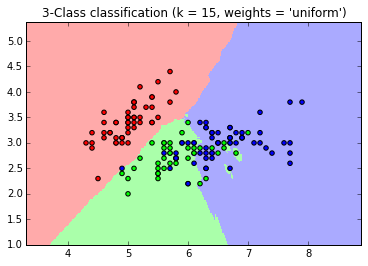

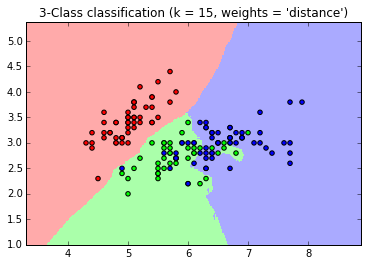

In [148]:
# example of code implementing Nearest neighbor from scikits.learn:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## Comparing supervised classifier methods

1. predict the previous classification method accuracy using the **cross-validation** method (! never use testing samples for the learning)

2. evaluate performances for other supervised classifiers such as SVM, DT, others...